In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import simulation as sim
import onedquad as quad
import control as control
import onedphysics as phy

In [2]:
clock = sim.Model("clock", control.Clock())
profile = sim.Controller("profile", control.ProfileRegulator())
motor = sim.Model("motor", quad.Motor(1))
model = sim.Compound("model", [clock, profile, motor])
world = sim.Simulation(model)
clock.connect("time", world.get("time"))
profile.connect("signal", clock.get("signal"))
profile.connect("time", world.get("time"))
motor.connect("target", profile.get("target"))
model.init()
clock.setparam('frequency',0.12)
motor.setparam('e',20.0)
profile.setparam('profile', [(0,0), (10,60),(40,0)])

In [3]:
model.getallparams()

{'clock': {'clock': 0.0, 'frequency': 0.12},
 'profile': {'target': 0.0,
  'profile': [(-1e+17, 0.0), (0, 0), (10, 60), (40, 0)]},
 'motor': {'thrust': 0.0, 'e': 20.0}}

In [4]:
sym = pd.DataFrame(world.simulate(0.0,80.0,0.0001))
sym

,time,clockclock,profiletarget,motorthrust
0,0.0000,0.000000,0.0,0.0
1,0.0001,8.333333,0.0,0.0
2,0.0002,8.333333,0.0,0.0
3,0.0003,8.333333,0.0,0.0
4,0.0004,8.333333,0.0,0.0
...,...,...,...,...
799995,79.9995,83.333333,0.0,0.0
799996,79.9996,83.333333,0.0,0.0
799997,79.9997,83.333333,0.0,0.0
799998,79.9998,83.333333,0.0,0.0


<IPython.core.display.Javascript object>


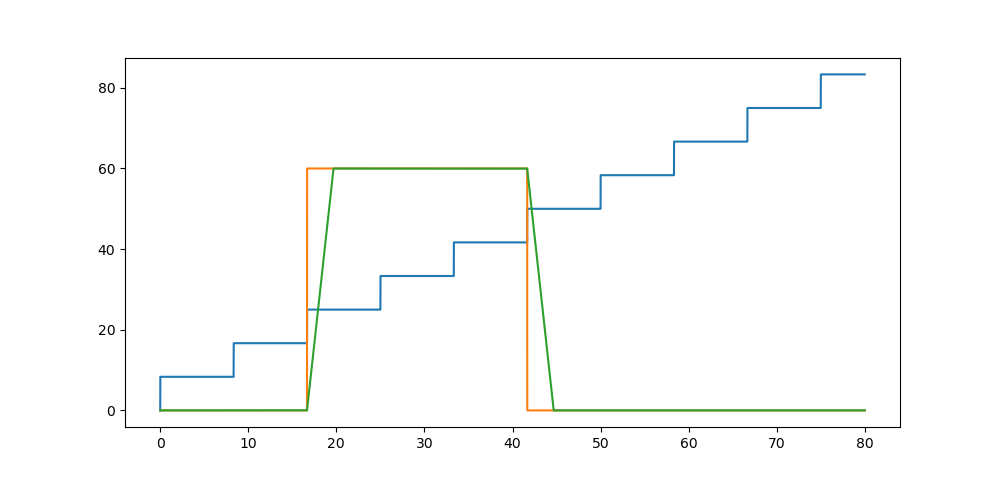

In [5]:
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_subplot(1, 1, 1)
ax.plot(sym[['time']],sym[['clockclock']])
ax.plot(sym[['time']],sym[['profiletarget']])
ax.plot(sym[['time']],sym[['motorthrust']])